# Objective of Surprise Housing - Assignment Solution

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia

To build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.


### House Price Prediction - Assignment Based on_Ridge_Lasso_Regression

The solution is divided into the following sections: 
- Data understanding and exploration
- Data cleaning
- Data preparation
- Model building and evaluation
- Regularization using Ridge & Lasso
- Final Model Building
- Conclusions & Inferences


### 1. Data Understanding and Exploration

Let's first have a look at the dataset and understand the size, attribute names etc.

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')


In [26]:
# reading the dataset
house_df = pd.read_csv("C:/Users/jigyasu/Desktop/Housing Price Assignment/train.csv")

In [27]:
house_df.shape

(1460, 81)

In [28]:
# summary of the dataset: 205 rows, 26 columns, no null values
print(house_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [29]:
# head
house_df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature MiscVal  \
0         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
1         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
2         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
3         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
4         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008        WD         Normal     208500  
1      5   2007        WD         Normal     181500  
2      9   2008        WD         Normal     223500  
3      2   2006        WD        Abnorml     140000  
4     12   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [30]:
# Columns

house_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [31]:
# dropping duplicate values (if any)

house_df.drop_duplicates(subset=None, keep='first', inplace= True)
house_df.head()


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature MiscVal  \
0         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
1         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
2         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
3         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
4         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008        WD         Normal     208500  
1      5   2007        WD         Normal     181500  
2      9   2008        WD         Normal     223500  
3      2   2006        WD        Abnorml     140000  
4     12   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [32]:
house_df.shape

(1460, 81)

#### There are NO Duplicate Rows.

In [33]:
# Checking details of Numerical features

house_df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

           ...         WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  \
count      ...        1460.000000  1460.000000    1460.000000  1460.000000   
mean       ...          94.244521    46.660274      21.954110     3.409589   
std        ...         125.338794    66.256028      61.119149    29.317331   
min        ...           0.000000     0.000000       0.000000     0.000000   
25%        ...           0.000000     0.000000       0.000000     0.000000   
50%        ...           0.000000    25.000000       0.000000     0.000000   
75%        ...         168.000000    68.000000       0.000000     0.000000   
max        ...         857.000000   547.000000     552.000000   508.000000   

       ScreenPorch     PoolArea       MiscVal       MoSold       YrSold  \
count  1460.000000  1460.000000   1460.000000  1460.000000  1460.000000   
mean     15.060959     2.758904     43.489041     6.321918  2007.815753   
std      55.757415    40.177307    496.123024     2.703626     1.328095   
min       0.000000     0.000000      0.000000     1.000000  2006.000000   
25%       0.000000     0.000000      0.000000     5.000000  2007.000000   
50%       0.000000     0.000000      0.000000     6.000000  2008.000000   
75%       0.000000     0.000000      0.000000     8.000000  2009.000000   
max     480.000000   738.000000  15500.000000    12.000000  2010.000000   

           SalePrice  
count    1460.000000  
mean   180921.195890  
std     79442.502883  
min     34900.000000  
25%    129975.000000  
50%    163000.000000  
75%    214000.000000  
max    755000.000000  

[8 rows x 38 columns]

### Data Cleaning 

#### Filling NA values of following Categorical features with appropriate categories value as per data dictionary

In [34]:

house_df.fillna({'Alley': 'NoAlley'}, inplace=True)

house_df.fillna({'BsmtExposure': 'NoBasement'}, inplace=True)

house_df.fillna({'BsmtFinType1': 'NoBasement'}, inplace=True)
                 
house_df.fillna({'BsmtFinType2': 'NoBasement'}, inplace=True)    

house_df.fillna({'BsmtQual': 'NoBasement'}, inplace=True) 

house_df.fillna({'BsmtCond': 'NoBasement'}, inplace=True) 

house_df.fillna({'GarageType': 'NoGarage'}, inplace=True)  

house_df.fillna({'GarageQual': 'NoGarage'}, inplace=True)  

house_df.fillna({'GarageCond': 'NoGarage'}, inplace=True)  

house_df.fillna({'GarageFinish': 'NoGarage'}, inplace=True)  

house_df.fillna({'Fence': 'NoFence'}, inplace=True)  

house_df.fillna({'MasVnrType': 'NoneType'}, inplace=True) 

house_df.fillna({'MasVnrArea': 0 }, inplace=True) 

house_df.fillna({'MiscFeature': 'NoneType'}, inplace=True) 

house_df.fillna({'PoolQC': 'NoPool'}, inplace=True) 

house_df.fillna({'FireplaceQu': 'NoFireplace'}, inplace=True)


In [35]:
# LotFrontage: fill NA with mean value

house_df['LotFrontage'] = house_df['LotFrontage'].fillna(house_df['LotFrontage'].mean())

# OverallCond as categorical

house_df['OverallCond'] = house_df['OverallCond'].astype(str)

# Electrical: filling NA with high Populated values
house_df['Electrical'] = house_df['Electrical'].fillna(house_df['Electrical'].mode()[0])



In [36]:
# Coverting from int to Str

house_df['MSSubClass']= house_df['MSSubClass'].astype(str)
house_df['YrSold'] = house_df['YrSold'].astype(str)

In [37]:
house_df.head()

Id MSSubClass MSZoning  LotFrontage  LotArea Street    Alley LotShape  \
0   1         60       RL         65.0     8450   Pave  NoAlley      Reg   
1   2         20       RL         80.0     9600   Pave  NoAlley      Reg   
2   3         60       RL         68.0    11250   Pave  NoAlley      IR1   
3   4         70       RL         60.0     9550   Pave  NoAlley      IR1   
4   5         60       RL         84.0    14260   Pave  NoAlley      IR1   

  LandContour Utilities    ...     PoolArea  PoolQC    Fence MiscFeature  \
0         Lvl    AllPub    ...            0  NoPool  NoFence    NoneType   
1         Lvl    AllPub    ...            0  NoPool  NoFence    NoneType   
2         Lvl    AllPub    ...            0  NoPool  NoFence    NoneType   
3         Lvl    AllPub    ...            0  NoPool  NoFence    NoneType   
4         Lvl    AllPub    ...            0  NoPool  NoFence    NoneType   

  MiscVal MoSold YrSold  SaleType SaleCondition  SalePrice  
0       0      2   2008        WD        Normal     208500  
1       0      5   2007        WD        Normal     181500  
2       0      9   2008        WD        Normal     223500  
3       0      2   2006        WD       Abnorml     140000  
4       0     12   2008        WD        Normal     250000  

[5 rows x 81 columns]

#### Dropping The Features which are not significant for Analysis

#### GarageYrBlt is same as 'YearBuilt' thus this seems to be redundant and also has some null values thus could be removed. 'MoSold' also seems to be insignificant, thus can be dropped.


In [38]:
house_df = house_df.drop(['Id','GarageYrBlt','MoSold'], axis=1)
house_df.shape

(1460, 78)

#### Creating a new feature as 'HouseAge' 

In [39]:
house_df['HouseAge']= 2019-house_df['YearBuilt']


house_df['House_RemodelAge']= 2019-house_df['YearRemodAdd']


In [40]:
house_df.head()

MSSubClass MSZoning  LotFrontage  LotArea Street    Alley LotShape  \
0         60       RL         65.0     8450   Pave  NoAlley      Reg   
1         20       RL         80.0     9600   Pave  NoAlley      Reg   
2         60       RL         68.0    11250   Pave  NoAlley      IR1   
3         70       RL         60.0     9550   Pave  NoAlley      IR1   
4         60       RL         84.0    14260   Pave  NoAlley      IR1   

  LandContour Utilities LotConfig        ...         PoolQC    Fence  \
0         Lvl    AllPub    Inside        ...         NoPool  NoFence   
1         Lvl    AllPub       FR2        ...         NoPool  NoFence   
2         Lvl    AllPub    Inside        ...         NoPool  NoFence   
3         Lvl    AllPub    Corner        ...         NoPool  NoFence   
4         Lvl    AllPub       FR2        ...         NoPool  NoFence   

  MiscFeature MiscVal YrSold SaleType  SaleCondition SalePrice  HouseAge  \
0    NoneType       0   2008       WD         Normal    208500        16   
1    NoneType       0   2007       WD         Normal    181500        43   
2    NoneType       0   2008       WD         Normal    223500        18   
3    NoneType       0   2006       WD        Abnorml    140000       104   
4    NoneType       0   2008       WD         Normal    250000        19   

   House_RemodelAge  
0                16  
1                43  
2                17  
3                49  
4                19  

[5 rows x 80 columns]

In [41]:
# Checking percentage of missing values after removing the missing values

round(100*(house_df.isnull().sum()/len(house_df.index)), 2)

MSSubClass          0.0
MSZoning            0.0
LotFrontage         0.0
LotArea             0.0
Street              0.0
Alley               0.0
LotShape            0.0
LandContour         0.0
Utilities           0.0
LotConfig           0.0
LandSlope           0.0
Neighborhood        0.0
Condition1          0.0
Condition2          0.0
BldgType            0.0
HouseStyle          0.0
OverallQual         0.0
OverallCond         0.0
YearBuilt           0.0
YearRemodAdd        0.0
RoofStyle           0.0
RoofMatl            0.0
Exterior1st         0.0
Exterior2nd         0.0
MasVnrType          0.0
MasVnrArea          0.0
ExterQual           0.0
ExterCond           0.0
Foundation          0.0
BsmtQual            0.0
                   ... 
BedroomAbvGr        0.0
KitchenAbvGr        0.0
KitchenQual         0.0
TotRmsAbvGrd        0.0
Functional          0.0
Fireplaces          0.0
FireplaceQu         0.0
GarageType          0.0
GarageFinish        0.0
GarageCars          0.0
GarageArea      

In [42]:
# Checking percentage of missing values after removing the missing values

round(100*(house_df.isnull().sum()/len(house_df.index)), 2)

MSSubClass          0.0
MSZoning            0.0
LotFrontage         0.0
LotArea             0.0
Street              0.0
Alley               0.0
LotShape            0.0
LandContour         0.0
Utilities           0.0
LotConfig           0.0
LandSlope           0.0
Neighborhood        0.0
Condition1          0.0
Condition2          0.0
BldgType            0.0
HouseStyle          0.0
OverallQual         0.0
OverallCond         0.0
YearBuilt           0.0
YearRemodAdd        0.0
RoofStyle           0.0
RoofMatl            0.0
Exterior1st         0.0
Exterior2nd         0.0
MasVnrType          0.0
MasVnrArea          0.0
ExterQual           0.0
ExterCond           0.0
Foundation          0.0
BsmtQual            0.0
                   ... 
BedroomAbvGr        0.0
KitchenAbvGr        0.0
KitchenQual         0.0
TotRmsAbvGrd        0.0
Functional          0.0
Fireplaces          0.0
FireplaceQu         0.0
GarageType          0.0
GarageFinish        0.0
GarageCars          0.0
GarageArea      

In [43]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 80 columns):
MSSubClass          1460 non-null object
MSZoning            1460 non-null object
LotFrontage         1460 non-null float64
LotArea             1460 non-null int64
Street              1460 non-null object
Alley               1460 non-null object
LotShape            1460 non-null object
LandContour         1460 non-null object
Utilities           1460 non-null object
LotConfig           1460 non-null object
LandSlope           1460 non-null object
Neighborhood        1460 non-null object
Condition1          1460 non-null object
Condition2          1460 non-null object
BldgType            1460 non-null object
HouseStyle          1460 non-null object
OverallQual         1460 non-null int64
OverallCond         1460 non-null object
YearBuilt           1460 non-null int64
YearRemodAdd        1460 non-null int64
RoofStyle           1460 non-null object
RoofMatl            1460 non-null o

In [44]:
print(sum(house_df.isnull().sum() != 0))

0


#### NO NULL VALUES !!! We are good to go!!!

### Checking for Outliers

In [45]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%

house_df.describe(percentiles=[.05,.10,.15,.25, .5, .75, .90, .95, .99])

LotFrontage        LotArea  OverallQual    YearBuilt  YearRemodAdd  \
count  1460.000000    1460.000000  1460.000000  1460.000000   1460.000000   
mean     70.049958   10516.828082     6.099315  1971.267808   1984.865753   
std      22.024023    9981.264932     1.382997    30.202904     20.645407   
min      21.000000    1300.000000     1.000000  1872.000000   1950.000000   
5%       35.950000    3311.700000     4.000000  1916.000000   1950.000000   
10%      49.000000    5000.000000     5.000000  1924.900000   1950.000000   
15%      51.000000    6120.000000     5.000000  1936.000000   1955.000000   
25%      60.000000    7553.500000     5.000000  1954.000000   1967.000000   
50%      70.049958    9478.500000     6.000000  1973.000000   1994.000000   
75%      79.000000   11601.500000     7.000000  2000.000000   2004.000000   
90%      92.000000   14381.700000     8.000000  2006.000000   2006.000000   
95%     104.000000   17401.150000     8.000000  2007.000000   2007.000000   
99%     137.410000   37567.640000    10.000000  2009.000000   2009.000000   
max     313.000000  215245.000000    10.000000  2010.000000   2010.000000   

        MasVnrArea   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean    103.117123   443.639726    46.549315   567.240411  1057.429452   
std     180.731373   456.098091   161.319273   441.866955   438.705324   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
5%        0.000000     0.000000     0.000000     0.000000   519.300000   
10%       0.000000     0.000000     0.000000    74.900000   636.900000   
15%       0.000000     0.000000     0.000000   121.850000   701.700000   
25%       0.000000     0.000000     0.000000   223.000000   795.750000   
50%       0.000000   383.500000     0.000000   477.500000   991.500000   
75%     164.250000   712.250000     0.000000   808.000000  1298.250000   
90%     335.000000  1065.500000   117.200000  1232.000000  1602.200000   
95%     456.000000  1274.000000   396.200000  1468.000000  1753.000000   
99%     791.280000  1572.410000   830.380000  1797.050000  2155.050000   
max    1600.000000  5644.000000  1474.000000  2336.000000  6110.000000   

             ...          WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  \
count        ...         1460.000000  1460.000000    1460.000000  1460.000000   
mean         ...           94.244521    46.660274      21.954110     3.409589   
std          ...          125.338794    66.256028      61.119149    29.317331   
min          ...            0.000000     0.000000       0.000000     0.000000   
5%           ...            0.000000     0.000000       0.000000     0.000000   
10%          ...            0.000000     0.000000       0.000000     0.000000   
15%          ...            0.000000     0.000000       0.000000     0.000000   
25%          ...            0.000000     0.000000       0.000000     0.000000   
50%          ...            0.000000    25.000000       0.000000     0.000000   
75%          ...          168.000000    68.000000       0.000000     0.000000   
90%          ...          262.000000   130.000000     112.000000     0.000000   
95%          ...          335.000000   175.050000     180.150000     0.000000   
99%          ...          505.460000   285.820000     261.050000   168.000000   
max          ...          857.000000   547.000000     552.000000   508.000000   

       ScreenPorch     PoolArea       MiscVal      SalePrice     HouseAge  \
count  1460.000000  1460.000000   1460.000000    1460.000000  1460.000000   
mean     15.060959     2.758904     43.489041  180921.195890    47.732192   
std      55.757415    40.177307    496.123024   79442.502883    30.202904   
min       0.000000     0.000000      0.000000   34900.000000     9.000000   
5%        0.000000     0.000000      0.000000   88000.000000    12.000000   
10%       0.000000     0.000000      0.000000  106475.000000  

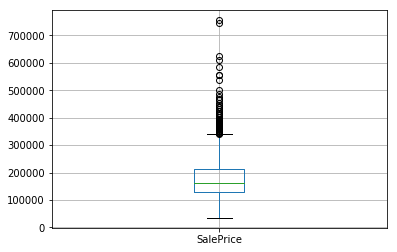

In [46]:
# Checking outliers for target variable

house_df.boxplot('SalePrice')

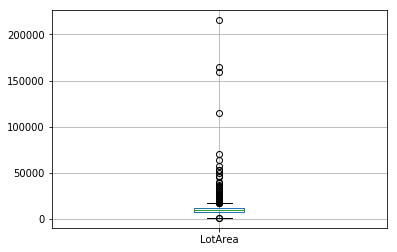

In [47]:
house_df.boxplot('LotArea')

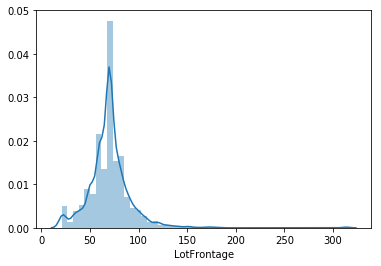

In [48]:

sns.distplot(house_df['LotFrontage'])
plt.show()

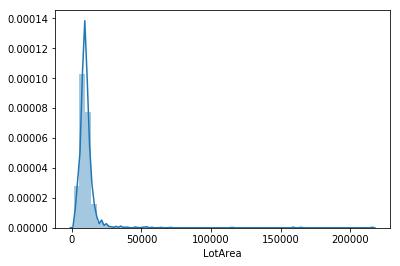

In [49]:

sns.distplot(house_df['LotArea'])
plt.show()

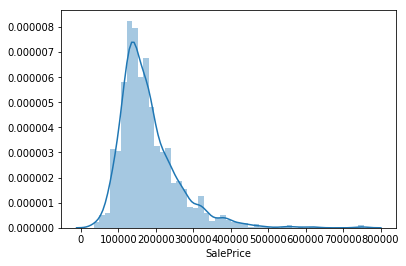

In [50]:
# target variable: price of house

sns.distplot(house_df['SalePrice'])
plt.show()

####  The Target Variable 'SalePrice' is right skewed and thus need to be log  transformed in order to have a model which correctly predicts the value on Test data.

Skew is: 1.8828757597682129


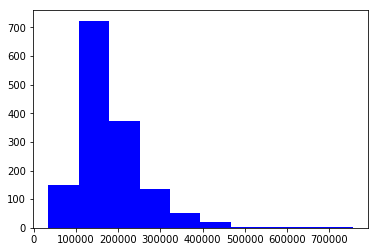

In [51]:

# to plot a histogram of SalePrice

print ("Skew is:", house_df.SalePrice.skew())
plt.hist(house_df.SalePrice, color='blue')
plt.show()


 Skew is: 0.12133506220520406


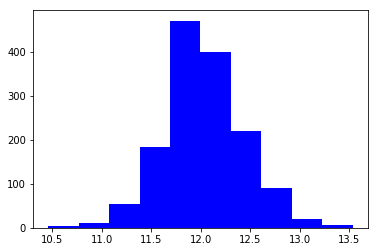

In [52]:
# use np.log() to transform SalePrice

target = np.log(house_df.SalePrice)
print ("\n Skew is:", target.skew())
plt.hist(target, color='blue')
plt.show()

In [53]:
house_df['SalePrice'].head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

#### Assigning 'SalePrice' as log transformed value

In [54]:
house_df['SalePrice']= target
house_df['SalePrice'].head()

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: SalePrice, dtype: float64

In [55]:
#Removing top Outliers from 'LotArea'


Q = house_df.LotArea.quantile(0.99)
df= house_df[~(house_df.LotArea > Q)]

df.shape

(1445, 80)

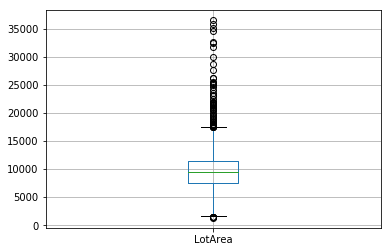

In [56]:
df.boxplot('LotArea')

In [57]:
# Checking outliers at 25%,50%,75%,90%,95% and 99%
df.describe(percentiles=[.25,.5,.75,.90,.95,.99])

LotFrontage       LotArea  OverallQual    YearBuilt  YearRemodAdd  \
count  1445.000000   1445.000000  1445.000000  1445.000000   1445.000000   
mean     69.814975   9776.588927     6.089965  1971.258131   1984.804152   
std      21.013931   4238.856255     1.376068    30.244144     20.662999   
min      21.000000   1300.000000     1.000000  1872.000000   1950.000000   
25%      60.000000   7500.000000     5.000000  1954.000000   1967.000000   
50%      70.049958   9430.000000     6.000000  1973.000000   1994.000000   
75%      79.000000  11475.000000     7.000000  2000.000000   2004.000000   
90%      92.000000  14133.000000     8.000000  2006.000000   2006.000000   
95%     103.000000  16557.000000     8.000000  2007.000000   2007.000000   
99%     134.000000  25201.960000    10.000000  2009.000000   2009.000000   
max     313.000000  36500.000000    10.000000  2010.000000   2010.000000   

        MasVnrArea   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF  \
count  1445.000000  1445.000000  1445.000000  1445.000000  1445.000000   
mean    101.757093   434.247059    45.271972   569.089965  1048.608997   
std     178.513432   429.520738   158.339134   442.563776   413.475723   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000   224.000000   794.000000   
50%       0.000000   379.000000     0.000000   481.000000   990.000000   
75%     163.000000   704.000000     0.000000   808.000000  1281.000000   
90%     322.400000  1054.800000   107.200000  1233.200000  1593.600000   
95%     447.000000  1258.000000   391.000000  1468.000000  1740.400000   
99%     780.960000  1555.120000   808.920000  1797.800000  2129.400000   
max    1600.000000  2188.000000  1474.000000  2336.000000  3206.000000   

             ...          WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  \
count        ...         1445.000000  1445.000000    1445.000000  1445.000000   
mean         ...           92.069896    46.113495      22.147405     3.444983   
std          ...          121.516884    65.313305      61.392992    29.467138   
min          ...            0.000000     0.000000       0.000000     0.000000   
25%          ...            0.000000     0.000000       0.000000     0.000000   
50%          ...            0.000000    24.000000       0.000000     0.000000   
75%          ...          168.000000    68.000000       0.000000     0.000000   
90%          ...          256.600000   130.000000     112.000000     0.000000   
95%          ...          325.800000   172.000000     182.400000     0.000000   
99%          ...          481.600000   278.480000     261.800000   168.000000   
max          ...          736.000000   547.000000     552.000000   508.000000   

       ScreenPorch     PoolArea       MiscVal    SalePrice     HouseAge  \
count  1445.000000  1445.000000   1445.000000  1445.000000  1445.000000   
mean     14.950865     2.455363     43.110035    12.019078    47.741869   
std      55.633605    38.380858    498.231790     0.397080    30.244144   
min       0.000000     0.000000      0.000000    10.460242     9.000000   
25%       0.000000     0.000000      0.000000    11.774520    19.000000   
50%       0.000000     0.000000      0.000000    11.995352    46.000000   
75%       0.000000     0.000000      0.000000    12.269047    65.000000   
90%       0.000000     0.000000      0.000000    12.525616    94.600000   
95%     159.200000     0.000000      0.000000    12.691580   103.000000   
99%     268.800000     0.000000    700.000000    12.993308   120.120000   
max     480.000000   738.000000  15500.000000    13.534473   147.000000   

       House_RemodelAge  
count       1445.000000  
mean          34.195848  
std           20.662999  
min            9.000000  
25%           15.000000  
50%           25.000000  
75%           52.000000  
90%           69.000000  
95%           69.000000  
99%           69.000000  
max           69.000000  

[11 rows x 34 colu

#### Checking the Value_Counts of all Categorical Features

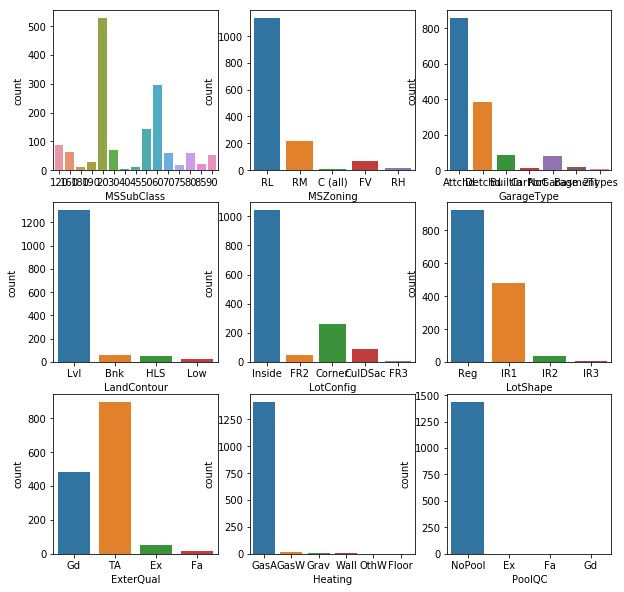

In [58]:
#Drawing the countplot 

plt.figure(figsize=(10,10))
plt.subplot(3,3,1)
sns.countplot(x="MSSubClass",data=df)
plt.subplot(3,3,2)
sns.countplot(x="MSZoning",data=df)
plt.subplot(3,3,3)
sns.countplot(x="GarageType",data=df)
plt.subplot(3,3,4)
sns.countplot(x="LandContour",data=df)
plt.subplot(3,3,5)
sns.countplot(x="LotConfig",data=df)
plt.subplot(3,3,6)
sns.countplot(x="LotShape",data=df)
plt.subplot(3,3,7)
sns.countplot(x="ExterQual",data=df)

plt.subplot(3,3,8)
sns.countplot(x="Heating",data=df)

plt.subplot(3,3,9)
sns.countplot(x="PoolQC",data=df)

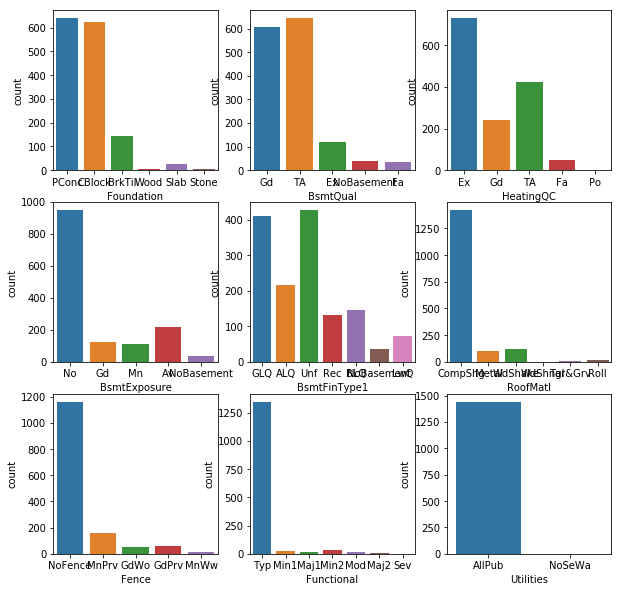

In [59]:

#Drawing the countplot 

plt.figure(figsize=(10,10))
sns.countplot(x="ExterCond",data=df)
plt.subplot(3,3,1)
sns.countplot(x="Foundation",data=df)
plt.subplot(3,3,2)
sns.countplot(x="BsmtQual",data=df)
plt.subplot(3,3,3)
sns.countplot(x="HeatingQC",data=df)
plt.subplot(3,3,4)
sns.countplot(x="BsmtExposure",data=df)
plt.subplot(3,3,5)
sns.countplot(x="BsmtFinType1",data=df)

plt.subplot(3,3,6)
sns.countplot(x="SaleCondition",data=df)

plt.subplot(3,3,6)
sns.countplot(x="RoofMatl",data=df)


plt.subplot(3,3,7)
sns.countplot(x="Fence",data=df)


plt.subplot(3,3,8)
sns.countplot(x="Functional",data=df)

plt.subplot(3,3,9)
sns.countplot(x="Utilities",data=df)

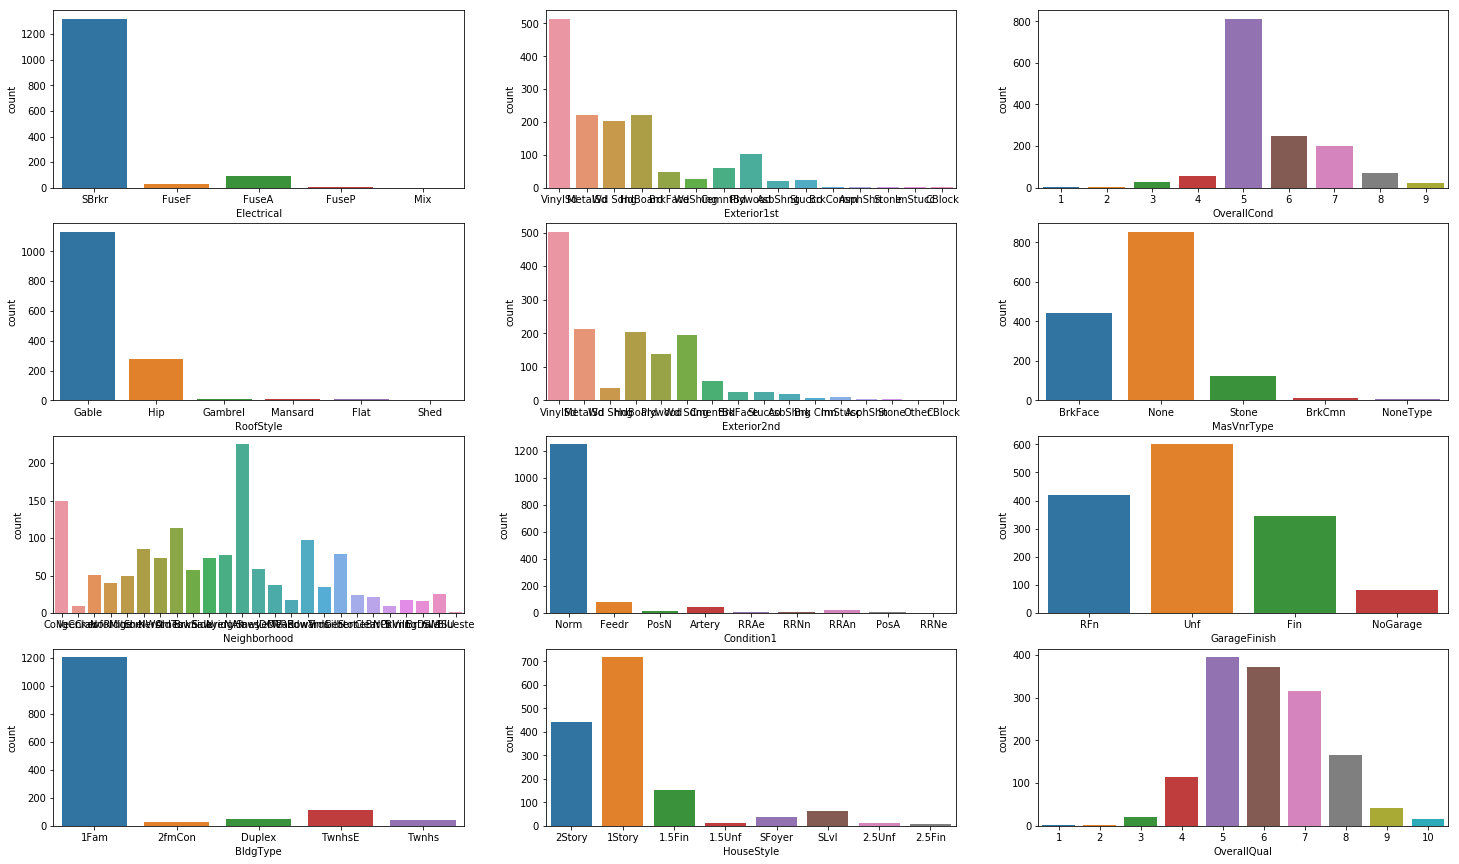

In [60]:
plt.figure(figsize=(25,15))

plt.subplot(4,3,1)
sns.countplot(x="Electrical",data=df)
plt.subplot(4,3,2)
sns.countplot(x="Exterior1st",data=df)
plt.subplot(4,3,3)
sns.countplot(x="OverallCond",data=df)
plt.subplot(4,3,4)
sns.countplot(x="RoofStyle",data=df)
plt.subplot(4,3,5)
sns.countplot(x="Exterior2nd",data=df)
plt.subplot(4,3,6)
sns.countplot(x="MasVnrType",data=df)
plt.subplot(4,3,7)
sns.countplot(x="Neighborhood",data=df)
plt.subplot(4,3,8)
sns.countplot(x="Condition1",data=df)
plt.subplot(4,3,9)
sns.countplot(x="GarageFinish",data=df)
plt.subplot(4,3,10)
sns.countplot(x="BldgType",data=df)
plt.subplot(4,3,11)
sns.countplot(x="HouseStyle",data=df)
plt.subplot(4,3,12)
sns.countplot(x="OverallQual",data=df)

#### Features : Electrical, Condition1, RoofStyle, RoofMatl, 'Utilities', 'Heating','Fence','BsmtCond', 'BsmtQual','BsmtExposure',  
#### 'BsmtFinType1','BsmtFinType2', 'Functional', 'GarageCond', 'GarageQual',  'GarageFinish','PoolQC', 'FireplaceQu', 'Alley'  seem to have low variance across different categories thus wont have significant effect on predicting SalePrice of houses. Thus could be removed from dataset.

In [61]:
df.drop(['Electrical','Condition1', 'RoofStyle', 'RoofMatl'],axis=1,inplace=True)

In [62]:
df.drop(['Utilities', 'Heating','Fence',
            'BsmtCond', 'BsmtQual','BsmtExposure',  'BsmtFinType1',
            'BsmtFinType2', 'Functional',  
            'GarageCond', 'GarageQual',  'GarageFinish',
             'PoolQC', 'FireplaceQu', 'Alley'],axis=1,inplace=True)

#### Data Exploration

To perform linear regression, the (numeric) target variable should be linearly related to *at least one another numeric variable*. Let's see whether that's true in this case.


We'll first subset the list of all (independent) numeric variables, and then make a **pairwise plot**.

In [63]:
# all numeric (float and int) variables in the dataset
df_numeric = df.select_dtypes(include=['float64', 'int64'])
df_numeric.head()

LotFrontage  LotArea  OverallQual  YearBuilt  YearRemodAdd  MasVnrArea  \
0         65.0     8450            7       2003          2003       196.0   
1         80.0     9600            6       1976          1976         0.0   
2         68.0    11250            7       2001          2002       162.0   
3         60.0     9550            7       1915          1970         0.0   
4         84.0    14260            8       2000          2000       350.0   

   BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF        ...         \
0         706           0        150          856        ...          
1         978           0        284         1262        ...          
2         486           0        434          920        ...          
3         216           0        540          756        ...          
4         655           0        490         1145        ...          

   WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  \
0           0           61              0          0            0         0   
1         298            0              0          0            0         0   
2           0           42              0          0            0         0   
3           0           35            272          0            0         0   
4         192           84              0          0            0         0   

   MiscVal  SalePrice  HouseAge  House_RemodelAge  
0        0  12.247694        16                16  
1        0  12.109011        43                43  
2        0  12.317167        18                17  
3        0  11.849398       104                49  
4        0  12.429216        19                19  

[5 rows x 34 columns]

In [64]:
df_numeric.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'SalePrice', 'HouseAge', 'House_RemodelAge'],
      dtype='object')

Let's now make a pairwise scatter plot and observe linear relationships.

<Figure size 1440x720 with 0 Axes>

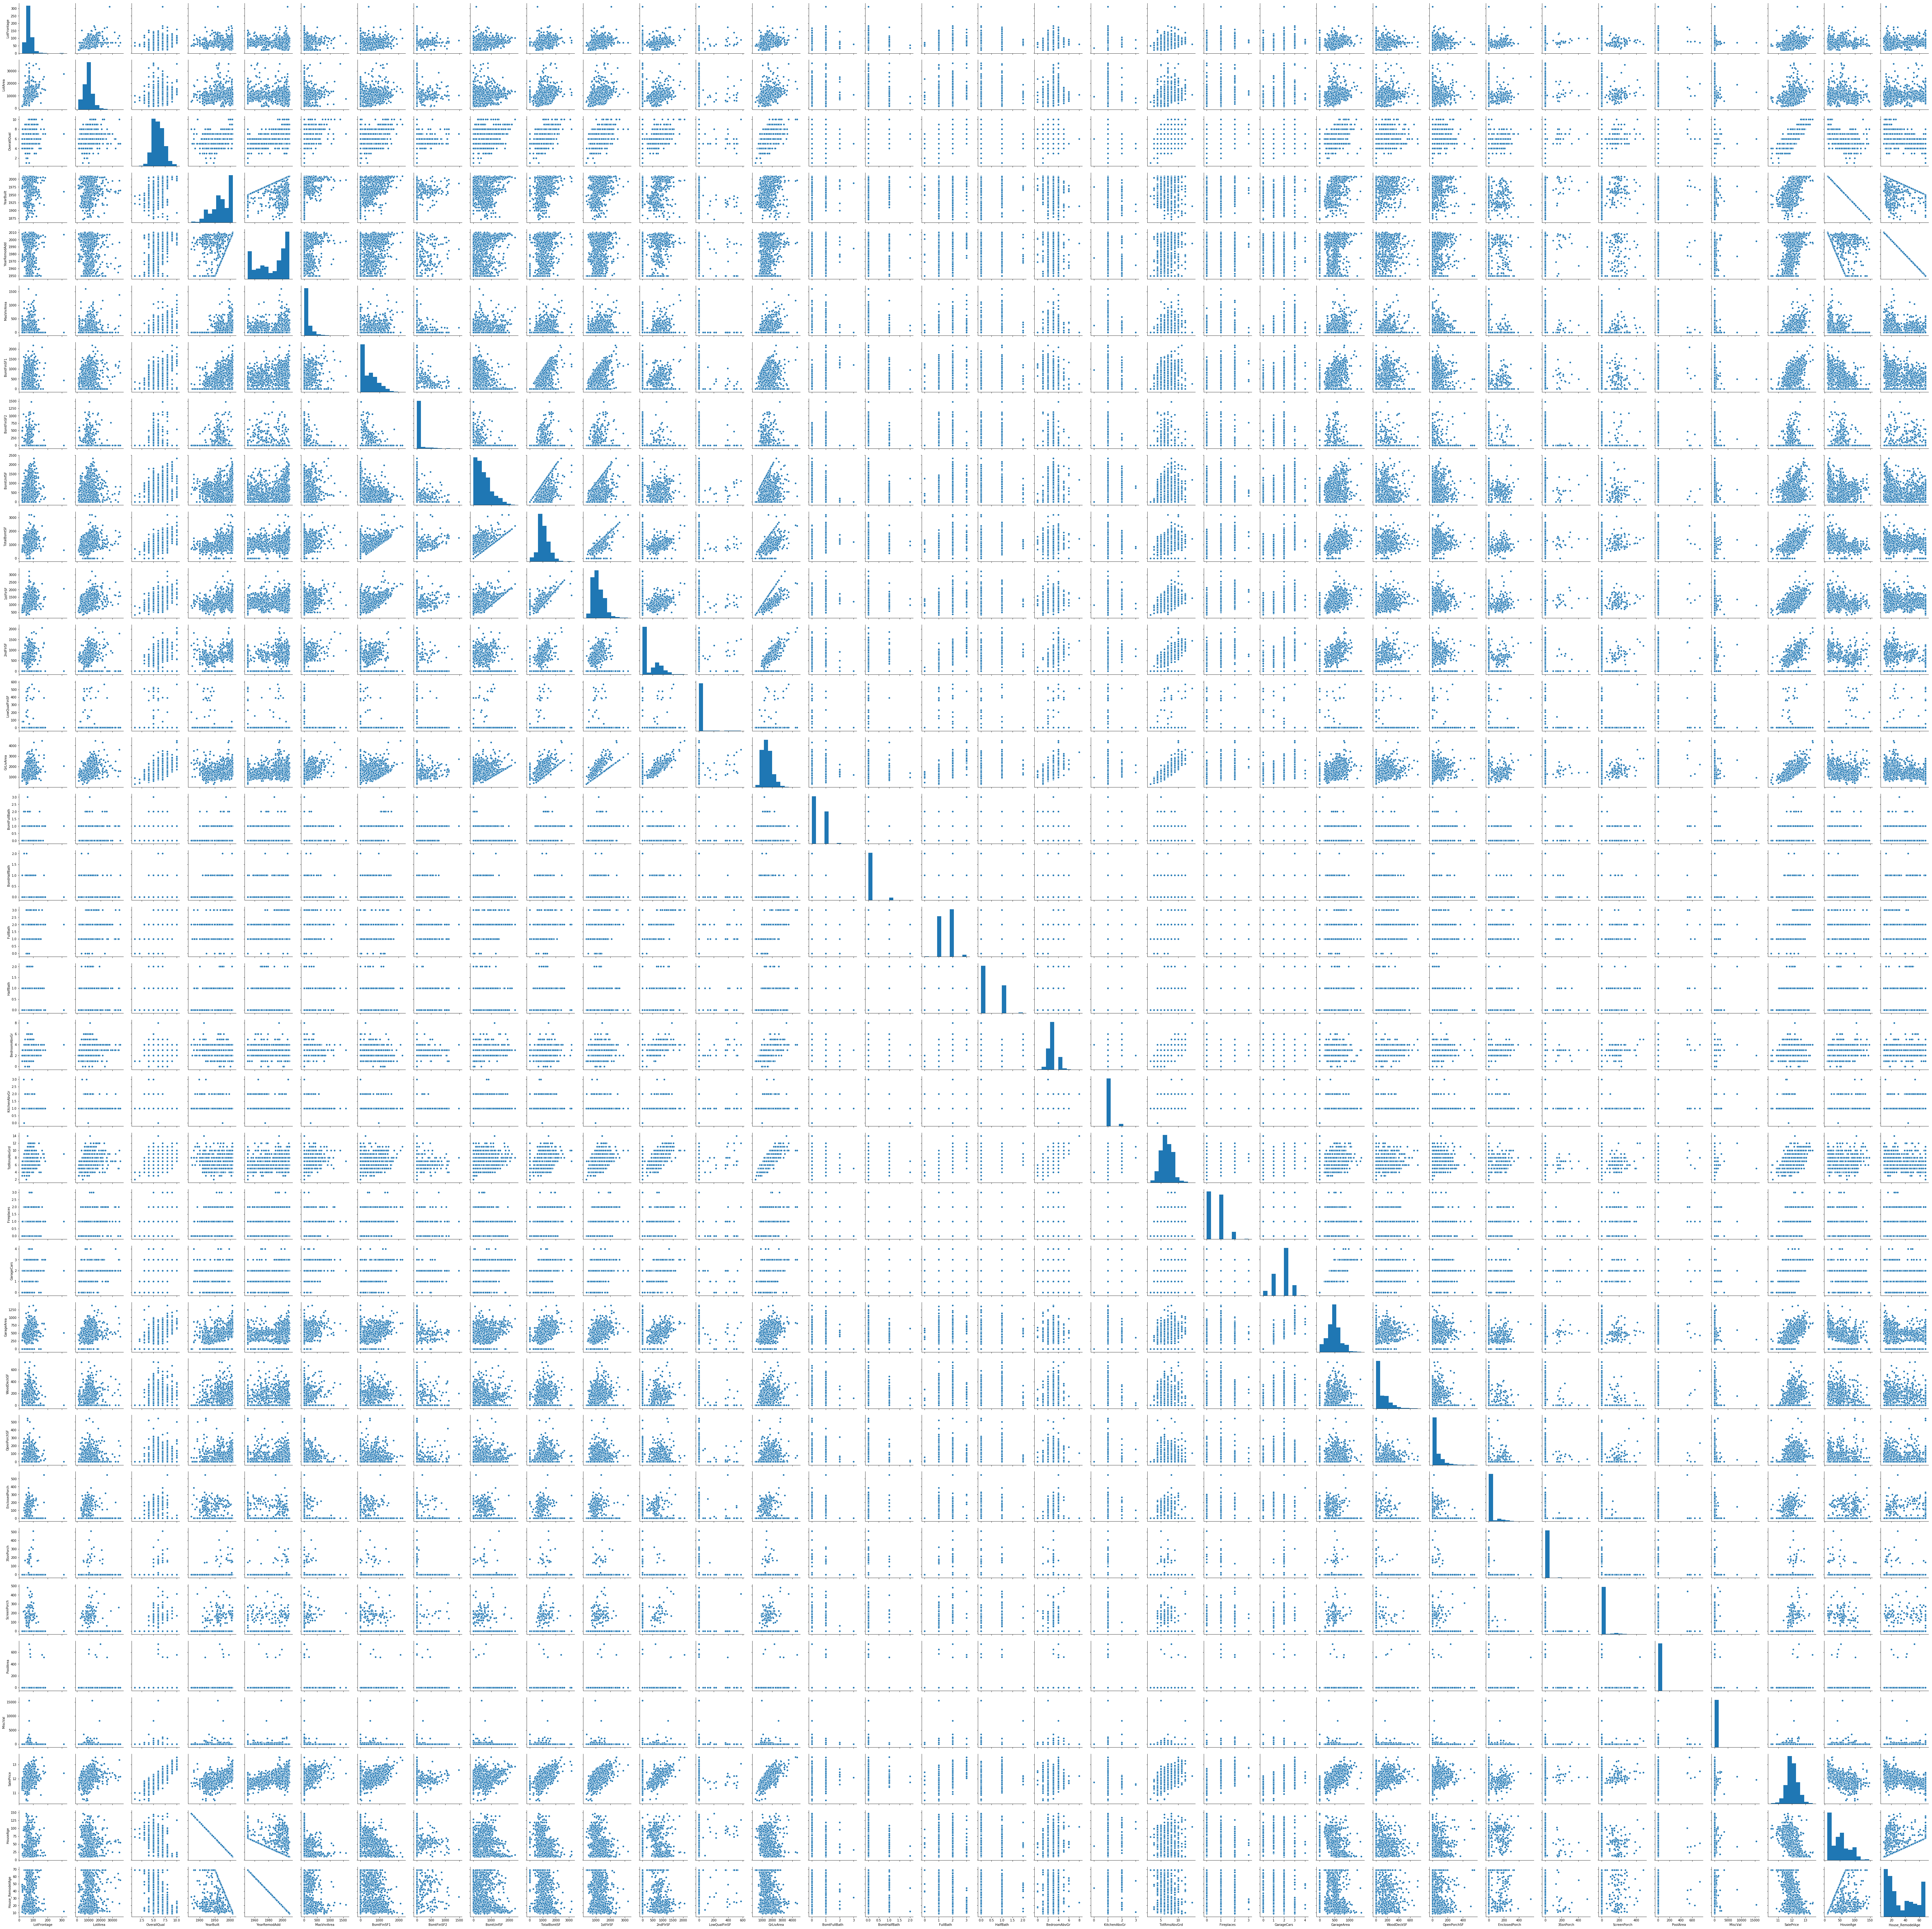

In [65]:
# paiwise scatter plot

plt.figure(figsize=(20, 10))
sns.pairplot(df_numeric)
plt.show()

This is quite hard to read, and we can rather plot correlations between variables. Also, a heatmap is pretty useful to visualise multiple correlations in one plot.

In [66]:
# correlation matrix
cor = df_numeric.corr()
cor

LotFrontage   LotArea  OverallQual  YearBuilt  YearRemodAdd  \
LotFrontage          1.000000  0.536363     0.221290   0.114541      0.079809   
LotArea              0.536363  1.000000     0.178807   0.045029      0.026053   
OverallQual          0.221290  0.178807     1.000000   0.572554      0.551326   
YearBuilt            0.114541  0.045029     0.572554   1.000000      0.595089   
YearRemodAdd         0.079809  0.026053     0.551326   0.595089      1.000000   
MasVnrArea           0.158155  0.150072     0.398616   0.308075      0.168308   
BsmtFinSF1           0.135851  0.193208     0.218332   0.249107      0.122842   
BsmtFinSF2           0.036337  0.068697    -0.064017  -0.046327     -0.067605   
BsmtUnfSF            0.131412  0.078557     0.313951   0.150664      0.181463   
TotalBsmtSF          0.295694  0.311096     0.538327   0.402296      0.295949   
1stFlrSF             0.366544  0.408534     0.470075   0.285057      0.241510   
2ndFlrSF             0.064919  0.111917     0.290896   0.005491      0.134160   
LowQualFinSF         0.040175  0.032428    -0.029922  -0.184460     -0.062333   
GrLivArea            0.328079  0.398445     0.591197   0.195672      0.286070   
BsmtFullBath         0.065043  0.096927     0.099794   0.186295      0.121809   
BsmtHalfBath        -0.004108  0.054773    -0.038945  -0.037174     -0.014711   
FullBath             0.180950  0.188955     0.555881   0.474028      0.440839   
HalfBath             0.042586  0.087508     0.268380   0.237858      0.181049   
BedroomAbvGr         0.251249  0.269080     0.106256  -0.069350     -0.043350   
KitchenAbvGr        -0.003738 -0.004963    -0.184364  -0.175439     -0.149645   
TotRmsAbvGrd         0.309613  0.349711     0.424407   0.091909      0.188682   
Fireplaces           0.217301  0.303984     0.399248   0.150590      0.111573   
GarageCars           0.281036  0.280066     0.600042   0.538977      0.420397   
GarageArea           0.307332  0.318625     0.556150   0.478247      0.371493   
WoodDeckSF           0.081088  0.170402     0.233083   0.231222      0.207248   
OpenPorchSF          0.108788  0.141221     0.300487   0.183689      0.221424   
EnclosedPorch        0.014358  0.013392    -0.112281  -0.388465     -0.192866   
3SsnPorch            0.066983  0.068773     0.031479   0.031514      0.045834   
ScreenPorch          0.045356  0.105338     0.064411  -0.049031     -0.041968   
PoolArea             0.101080  0.095579     0.045156  -0.005270     -0.003345   
MiscVal              0.002200  0.045581    -0.030341  -0.034012     -0.009858   
SalePrice            0.356707  0.385260     0.825441   0.593823      0.569694   
HouseAge            -0.114541 -0.045029    -0.572554  -1.000000     -0.595089   
House_RemodelAge    -0.079809 -0.026053    -0.551326  -0.595089     -1.000000   

                  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
LotFrontage         0.158155    0.135851    0.036337   0.131412     0.295694   
LotArea             0.150072    0.193208    0.068697   0.078557     0.311096   
OverallQual         0.398616    0.218332   -0.064017   0.313951     0.538327   
YearBuilt           0.308075    0.249107   -0.046327   0.150664     0.402296   
YearRemodAdd        0.168308    0.122842   -0.067605   0.181463     0.295949   
MasVnrArea          1.000000    0.233163   -0.068061   0.116214     0.340538   
BsmtFinSF1          0.233163    1.000000   -0.055366  -0.521620     0.459288   
BsmtFinSF2         -0.068061   -0.055366    1.000000  -0.204205     0.106862   
BsmtUnfSF           0.116214   -0.521620   -0.204205   1.000000     0.450289   
TotalBsmtSF         0.340538    0.459288    0.106862   0.450289     1.000000   
1stFlrSF            0.319292    0.386605    0.095303   0.341315     0.803430   
2ndFlrSF            0.159350   -0.168535   -0.094269   0.001505    -0.209564   
LowQualFinSF       -0.068925   -0.066210    0.016140   0.027765    -0.032880   
GrLivArea           0.364033    0.132014   -0.009599   0.25394

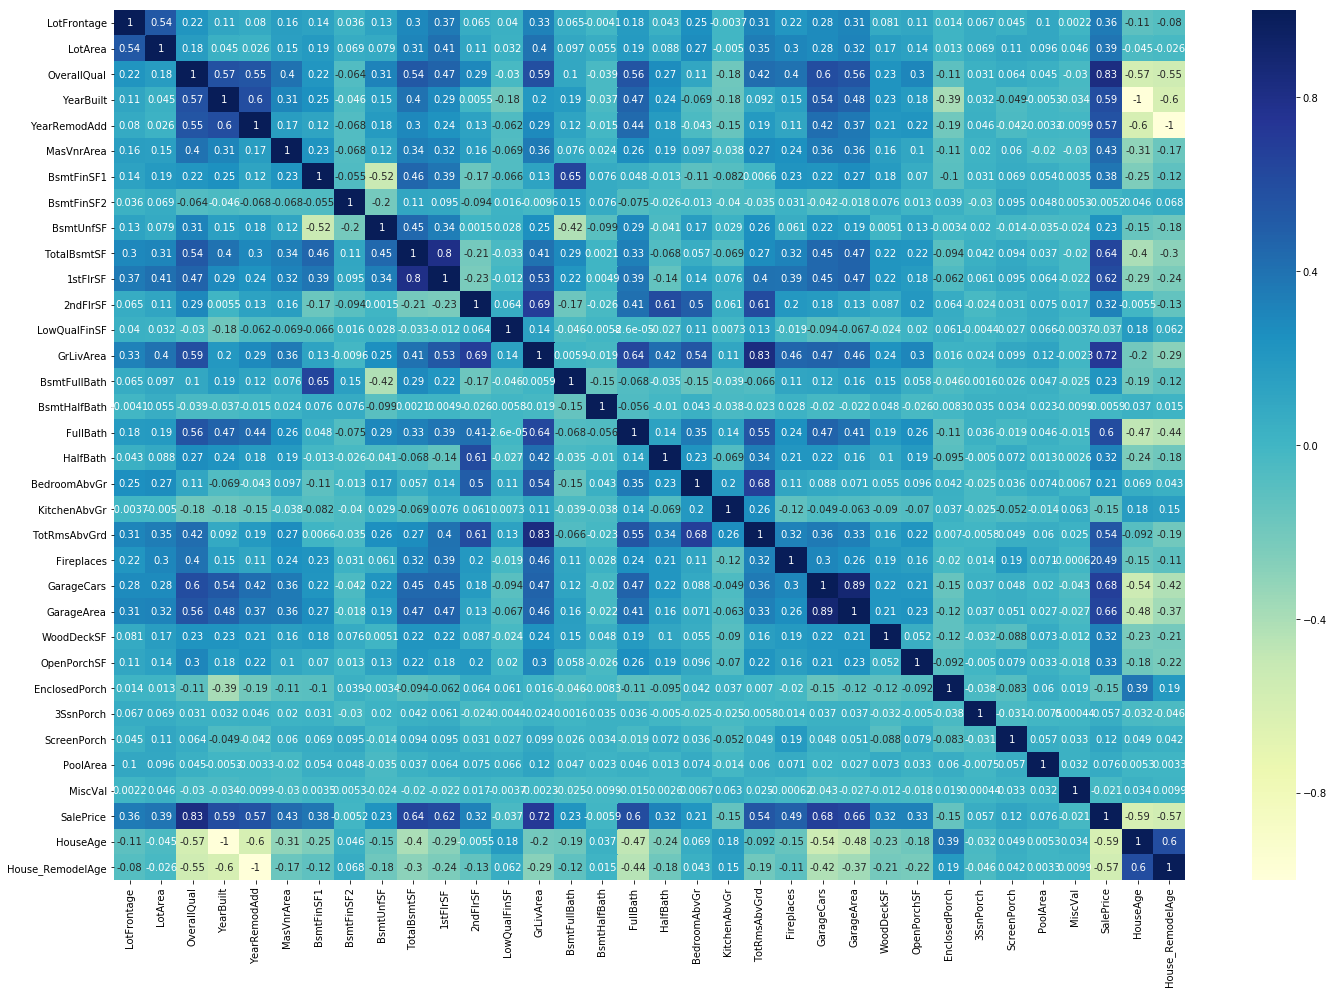

In [67]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(24,16))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()


The heatmap shows some useful insights:

Correlation of price with independent variables:

- Price is highly (positively) correlated with OverallQual, TotalBsmtSF,1stFlrSF, GrLivArea, FullBath, GarageArea, GarageCars,TotRmsAbvGrd, MasVnrArea, Fireplaces

- Price is negatively correlated to ```HouseAge``` and ``House_RemodelAge`` (-0.51 approximately).


Correlation among independent variables:

- Many independent variables are highly correlated like: `HouseAge``` and ``House_RemodelAge'
 `TotRmsAbvGrd`, `1stFlrSF`,`2ndFlrSF`, `FullBath` , `OverallQual` , `BedroomAbvGr` with `GrLivArea` 


In [68]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', 'CentralAir',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'GarageType', 'GarageCars',
       'GarageArea', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscFeature',
       'MiscVal', 'YrSold', 'SaleType', 'SaleCondition', 'SalePrice',
       'HouseAge', 'House_RemodelAge'],
      dtype='object')

#### Dropping the features which have very low correlation with target variables.

In [69]:
df.drop([ 'BsmtHalfBath', 'BsmtFullBath','LowQualFinSF','BsmtFinSF1', 'BsmtFinSF2','EnclosedPorch', 'YearBuilt', 'YearRemodAdd',
           'BsmtUnfSF','WoodDeckSF', 'OpenPorchSF','MiscVal', 'ScreenPorch', 
           '3SsnPorch','PoolArea'],axis=1,inplace=True)

In [70]:
df_ = df.select_dtypes(include=['float64', 'int64'])
df_.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'MasVnrArea', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'SalePrice', 'HouseAge',
       'House_RemodelAge'],
      dtype='object')

## 3. Data Preparation 


#### Data Preparation

Let's now prepare the data and build the model.

In [71]:
# split into X and y


X = df.loc[:, ['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'TotalBsmtSF', 'HeatingQC',
       'CentralAir', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageType', 
       'GarageCars', 'GarageArea', 'PavedDrive', 'MiscFeature',
       'SaleType', 'SaleCondition', 'SalePrice', 'HouseAge',
       'House_RemodelAge']]

y = df['SalePrice']


In [72]:
# creating dummy variables for categorical variables

# subset all categorical variables
df_categorical = X.select_dtypes(include=['object'])
df_categorical.head()


MSSubClass MSZoning Street LotShape LandContour LotConfig LandSlope  \
0         60       RL   Pave      Reg         Lvl    Inside       Gtl   
1         20       RL   Pave      Reg         Lvl       FR2       Gtl   
2         60       RL   Pave      IR1         Lvl    Inside       Gtl   
3         70       RL   Pave      IR1         Lvl    Corner       Gtl   
4         60       RL   Pave      IR1         Lvl       FR2       Gtl   

  Neighborhood Condition2 BldgType      ...      ExterCond Foundation  \
0      CollgCr       Norm     1Fam      ...             TA      PConc   
1      Veenker       Norm     1Fam      ...             TA     CBlock   
2      CollgCr       Norm     1Fam      ...             TA      PConc   
3      Crawfor       Norm     1Fam      ...             TA     BrkTil   
4      NoRidge       Norm     1Fam      ...             TA      PConc   

  HeatingQC CentralAir KitchenQual GarageType PavedDrive MiscFeature SaleType  \
0        Ex          Y          Gd     Attchd          Y    NoneType       WD   
1        Ex          Y          TA     Attchd          Y    NoneType       WD   
2        Ex          Y          Gd     Attchd          Y    NoneType       WD   
3        Gd          Y          Gd     Detchd          Y    NoneType       WD   
4        Ex          Y          Gd     Attchd          Y    NoneType       WD   

  SaleCondition  
0        Normal  
1        Normal  
2        Normal  
3       Abnorml  
4        Normal  

[5 rows x 26 columns]

In [73]:
df_categorical.columns

Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallCond', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'HeatingQC', 'CentralAir',
       'KitchenQual', 'GarageType', 'PavedDrive', 'MiscFeature', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [74]:
# convert into dummies
house_dummies = pd.get_dummies(df_categorical, drop_first=True)
house_dummies.head()

MSSubClass_160  MSSubClass_180  MSSubClass_190  MSSubClass_20  \
0               0               0               0              0   
1               0               0               0              1   
2               0               0               0              0   
3               0               0               0              0   
4               0               0               0              0   

   MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  \
0              0              0              0              0              1   
1              0              0              0              0              0   
2              0              0              0              0              1   
3              0              0              0              0              0   
4              0              0              0              0              1   

   MSSubClass_70          ...            SaleType_ConLI  SaleType_ConLw  \
0              0          ...                         0               0   
1              0          ...                         0               0   
2              0          ...                         0               0   
3              1          ...                         0               0   
4              0          ...                         0               0   

   SaleType_New  SaleType_Oth  SaleType_WD  SaleCondition_AdjLand  \
0             0             0            1                      0   
1             0             0            1                      0   
2             0             0            1                      0   
3             0             0            1                      0   
4             0             0            1                      0   

   SaleCondition_Alloca  SaleCondition_Family  SaleCondition_Normal  \
0                     0                     0                     1   
1                     0                     0                     1   
2                     0                     0                     1   
3                     0                     0                     0   
4                     0                     0                     1   

   SaleCondition_Partial  
0                      0  
1                      0  
2                      0  
3                      0  
4                      0  

[5 rows x 159 columns]

In [75]:
# drop categorical variables 
X = X.drop(list(df_categorical.columns), axis=1)

In [76]:
# concat dummy variables with X
X = pd.concat([X, house_dummies], axis=1)
X.head()

LotFrontage  LotArea  OverallQual  MasVnrArea  TotalBsmtSF  1stFlrSF  \
0         65.0     8450            7       196.0          856       856   
1         80.0     9600            6         0.0         1262      1262   
2         68.0    11250            7       162.0          920       920   
3         60.0     9550            7         0.0          756       961   
4         84.0    14260            8       350.0         1145      1145   

   2ndFlrSF  GrLivArea  FullBath  HalfBath          ...            \
0       854       1710         2         1          ...             
1         0       1262         2         0          ...             
2       866       1786         2         1          ...             
3       756       1717         1         0          ...             
4      1053       2198         2         1          ...             

   SaleType_ConLI  SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0               0               0             0             0            1   
1               0               0             0             0            1   
2               0               0             0             0            1   
3               0               0             0             0            1   
4               0               0             0             0            1   

   SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                      0                     0                     0   
1                      0                     0                     0   
2                      0                     0                     0   
3                      0                     0                     0   
4                      0                     0                     0   

   SaleCondition_Normal  SaleCondition_Partial  
0                     1                      0  
1                     1                      0  
2                     1                      0  
3                     0                      0  
4                     1                      0  

[5 rows x 178 columns]

# Splitting the data into Test-Train Split

In [77]:
# split into train and test

# Importing the library

from sklearn.model_selection import train_test_split

# Split the datafram into train and test sets

df_train, df_test = train_test_split(X, train_size=0.7, test_size=0.3, random_state=100)

In [78]:
X.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'MasVnrArea', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'FullBath', 'HalfBath',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=178)

In [79]:
X.shape

(1445, 178)

In [80]:
# scaling the features
# Importing the StandardScaler()


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()                                                         #creating Scaling Obj
varlist = ['LotFrontage', 'LotArea', 'OverallQual', 
       'MasVnrArea', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'SalePrice', 'HouseAge',
       'House_RemodelAge']

df_train[varlist] = scaler.fit_transform(df_train[varlist])                     # Scaling variables with  'fit_transform'


## 4. Model Building and Evaluation

In [81]:
# Let's take a look at the train dataframe now
df_train.head()

LotFrontage   LotArea  OverallQual  MasVnrArea  TotalBsmtSF  1stFlrSF  \
161      2.022131  1.003830     2.137999    3.318465     1.279372  1.158863   
460      0.300880 -0.395130     1.415808    0.082340    -0.476795 -0.838142   
554      0.792666  0.249957     0.693617    1.145471    -0.082844 -0.368576   
107     -0.928585 -0.888359    -0.750764   -0.560212    -0.578842 -0.954184   
1307    -0.436799 -0.378394    -0.750764   -0.560212    -0.101829 -0.411754   

      2ndFlrSF  GrLivArea  FullBath  HalfBath          ...            \
161   1.784668   2.409174  0.839975  1.252186          ...             
460   1.801129   0.916102  0.839975  1.252186          ...             
554   1.652981   1.142202  0.839975  1.252186          ...             
107  -0.792624  -1.418223 -1.026431 -0.754090          ...             
1307 -0.792624  -1.008800 -1.026431 -0.754090          ...             

      SaleType_ConLI  SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
161                0               0             0             0            1   
460                0               0             1             0            0   
554                0               0             0             0            1   
107                0               0             0             0            1   
1307               0               0             0             0            1   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
161                       0                     0                     0   
460                       0                     0                     0   
554                       0                     0                     0   
107                       0                     0                     0   
1307                      0                     0                     0   

      SaleCondition_Normal  SaleCondition_Partial  
161                      1                      0  
460                      0                      1  
554                      1                      0  
107                      0                      1  
1307                     1                      0  

[5 rows x 178 columns]

In [82]:
df_train.shape

(1011, 178)

In [83]:
# Splitting  the train dataset into X and y
y_train = df_train.pop('SalePrice')
X_train = df_train

In [84]:
lm = LinearRegression()  # Instantiating
lm.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [85]:
#Coefficients , intercepts

print(lm.coef_)
print(lm.intercept_)

[ 2.02296478e-02  6.35591517e-02  1.46640592e-01  2.16342654e-02
  1.70474165e-01 -1.79522781e-02  2.30733123e-03  2.91598967e-01
  3.24399842e-02  4.44002786e-02 -1.89425141e-02 -3.82487210e-02
  9.88861231e-03  4.35579795e-02  7.23656052e-02  3.70054197e-02
 -1.19350572e-01 -2.00558351e-02 -2.38221685e-01  6.78506826e-02
 -5.00003751e-02 -2.72870296e-02 -2.86992623e-01  5.96942076e-02
 -3.28037939e+11 -2.86780347e-02 -2.78425666e-02  2.20837668e-02
 -1.57946143e-01 -1.82376563e-01  6.27202175e-02 -7.00800807e+12
  9.98001469e-01  7.96983321e-01  7.15124569e-01  6.53294184e-01
  2.45510976e-01  1.32286837e-02  1.14812492e-01 -1.84917380e-02
  9.97595354e-02  7.05528530e-02  1.12226103e-01  8.06085289e-02
 -9.41923906e-02  3.69745158e-02 -3.44981963e-02  1.37232914e-01
 -1.31376949e-01  1.72548745e-01  1.38580877e-01  2.08359276e-01
  1.63425630e-01  1.01377521e-01  3.96335572e-01 -3.96698136e-03
  7.86139591e-03  7.27524359e-02 -2.44093716e-01  2.39019451e-03
  5.89833891e-02  9.56100

# Model Building -  RFE

In [86]:
# Import RFE

from sklearn.feature_selection import RFE
lm = LinearRegression()   
rfe = RFE(lm, 50)
rfe.fit(X_train, y_train)  
print(rfe.support_)        #True or False   
print(rfe.ranking_) 

[False False  True False  True False False  True False False False False
 False False  True False False False  True False False False False  True
 False False False False False False False  True  True  True  True  True
 False False False False False False False False False  True False False
 False  True  True False False  True False False False False False False
 False False False False  True False False False False False  True  True
  True  True False False  True False  True  True False  True False False
  True False  True False False False False  True  True  True False False
  True  True  True  True  True False  True False False False False False
 False False False False False False False False  True False False False
 False False False False False False False False False False  True False
 False False False False False False False False False False False False
 False False False False False  True  True  True False False False False
  True False False False  True  True  True False Fa

In [87]:
columns = X_train.columns[rfe.support_]
columns

Index(['OverallQual', 'TotalBsmtSF', 'GrLivArea', 'GarageCars',
       'MSSubClass_160', 'MSSubClass_40', 'MSSubClass_90', 'MSZoning_FV',
       'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'LotConfig_FR3',
       'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_CollgCr',
       'Neighborhood_NridgHt', 'Neighborhood_StoneBr', 'Neighborhood_Timber',
       'Neighborhood_Veenker', 'Condition2_Feedr', 'Condition2_PosN',
       'Condition2_RRAn', 'Condition2_RRNn', 'BldgType_Duplex',
       'HouseStyle_1.5Unf', 'HouseStyle_2.5Fin', 'OverallCond_2',
       'OverallCond_3', 'OverallCond_4', 'OverallCond_7', 'OverallCond_8',
       'OverallCond_9', 'Exterior1st_AsphShn', 'Exterior1st_BrkComm',
       'Exterior1st_CBlock', 'Exterior2nd_CBlock', 'MasVnrType_NoneType',
       'KitchenQual_Fa', 'KitchenQual_Gd', 'KitchenQual_TA',
       'GarageType_Detchd', 'MiscFeature_NoneType', 'MiscFeature_Othr',
       'MiscFeature_Shed', 'SaleType_Con', 'SaleType_ConLD', 'SaleType_New',
       '

In [88]:
X_train.columns[~rfe.support_]

Index(['LotFrontage', 'LotArea', 'MasVnrArea', '1stFlrSF', '2ndFlrSF',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       ...
       'PavedDrive_P', 'PavedDrive_Y', 'MiscFeature_TenC', 'SaleType_CWD',
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_WD',
       'SaleCondition_Alloca', 'SaleCondition_Family',
       'SaleCondition_Partial'],
      dtype='object', length=127)

In [89]:
import statsmodels.api as sm  
X_train_rfe1 = X_train[columns]
X_train_rfe1 = sm.add_constant(X_train_rfe1) #Adding Constant
X_train_rfe1.head()

const  OverallQual  TotalBsmtSF  GrLivArea  GarageCars  MSSubClass_160  \
161     1.0     2.137999     1.279372   2.409174    1.692924               0   
460     1.0     1.415808    -0.476795   0.916102    0.345250               0   
554     1.0     0.693617    -0.082844   1.142202    1.692924               0   
107     1.0    -0.750764    -0.578842  -1.418223   -1.002424               0   
1307    1.0    -0.750764    -0.101829  -1.008800    0.345250               0   

      MSSubClass_40  MSSubClass_90  MSZoning_FV  MSZoning_RH  \
161               0              0            0            0   
460               0              0            1            0   
554               0              0            0            0   
107               0              0            0            0   
1307              0              0            0            0   

              ...           GarageType_Detchd  MiscFeature_NoneType  \
161           ...                           0                     1   
460           ...                           0                     1   
554           ...                           0                     1   
107           ...                           1                     1   
1307          ...                           1                     1   

      MiscFeature_Othr  MiscFeature_Shed  SaleType_Con  SaleType_ConLD  \
161                  0                 0             0               0   
460                  0                 0             0               0   
554                  0                 0             0               0   
107                  0                 0             0               0   
1307                 0                 0             0               0   

      SaleType_New  SaleType_Oth  SaleCondition_AdjLand  SaleCondition_Normal  
161              0             0                      0                     1  
460              1             0                      0                     0  
554              0             0                      0                     1  
107              0             0                      0                     0  
1307             0             0                      0                     1  

[5 rows x 51 columns]

In [90]:
lm1 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     171.0
Date:                Mon, 08 Jul 2019   Prob (F-statistic):               0.00
Time:                        20:22:56   Log-Likelihood:                -294.69
No. Observations:                1011   AIC:                             687.4
Df Residuals:                     962   BIC:                             928.4
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.75

In [91]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif

Features          VIF
0                   const  1251.790000
1             OverallQual     3.600000
2             TotalBsmtSF     1.770000
3               GrLivArea     2.020000
4              GarageCars     1.940000
5          MSSubClass_160     1.740000
6           MSSubClass_40     1.240000
7           MSSubClass_90          inf
8             MSZoning_FV    10.120000
9             MSZoning_RH     2.650000
10            MSZoning_RL    35.200000
11            MSZoning_RM    28.290000
12          LotConfig_FR3     1.100000
13   Neighborhood_Blueste     1.090000
14    Neighborhood_BrDale     1.460000
15   Neighborhood_CollgCr     1.270000
16   Neighborhood_NridgHt     1.540000
17   Neighborhood_StoneBr     1.160000
18    Neighborhood_Timber     1.110000
19   Neighborhood_Veenker     1.160000
20       Condition2_Feedr     1.240000
21        Condition2_PosN     1.030000
22        Condition2_RRAn     1.040000
23        Condition2_RRNn     1.020000
24        BldgType_Duplex          inf
25      HouseStyle_1.5Unf     1.060000
26      HouseStyle_2.5Fin     1.100000
27          OverallCond_2     1.150000
28          OverallCond_3     1.250000
29          OverallCond_4     1.190000
30          OverallCond_7     1.180000
31          OverallCond_8     1.180000
32          OverallCond_9     1.070000
33    Exterior1st_AsphShn     1.050000
34    Exterior1st_BrkComm     1.140000
35     Exterior1st_CBlock          inf
36     Exterior2nd_CBlock          inf
37    MasVnrType_NoneType     1.010000
38         KitchenQual_Fa     2.000000
39         KitchenQual_Gd     5.570000
40         KitchenQual_TA     7.440000
41      GarageType_Detchd     1.400000
42   MiscFeature_NoneType    35.180000
43       MiscFeature_Othr     3.220000
44       MiscFeature_Shed    33.360000
45           SaleType_Con     1.130000
46         SaleType_ConLD     1.180000
47           SaleType_New     2.260000
48           SaleType_Oth     1.090000
49  SaleCondition_AdjLand     1.070000
50   SaleCondition_Normal     2.010000

### Removing features which have very high VIF

In [92]:
X_train_new = X_train_rfe1.drop(['Exterior2nd_CBlock'], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
# Running the linear model
lm2 = sm.OLS(y_train,X_train_lm).fit()


In [93]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif

Features          VIF
0                   const  1251.790000
1             OverallQual     3.600000
2             TotalBsmtSF     1.770000
3               GrLivArea     2.020000
4              GarageCars     1.940000
5          MSSubClass_160     1.740000
6           MSSubClass_40     1.240000
7           MSSubClass_90          inf
8             MSZoning_FV    10.120000
9             MSZoning_RH     2.650000
10            MSZoning_RL    35.200000
11            MSZoning_RM    28.290000
12          LotConfig_FR3     1.100000
13   Neighborhood_Blueste     1.090000
14    Neighborhood_BrDale     1.460000
15   Neighborhood_CollgCr     1.270000
16   Neighborhood_NridgHt     1.540000
17   Neighborhood_StoneBr     1.160000
18    Neighborhood_Timber     1.110000
19   Neighborhood_Veenker     1.160000
20       Condition2_Feedr     1.240000
21        Condition2_PosN     1.030000
22        Condition2_RRAn     1.040000
23        Condition2_RRNn     1.020000
24        BldgType_Duplex          inf
25      HouseStyle_1.5Unf     1.060000
26      HouseStyle_2.5Fin     1.100000
27          OverallCond_2     1.150000
28          OverallCond_3     1.250000
29          OverallCond_4     1.190000
30          OverallCond_7     1.180000
31          OverallCond_8     1.180000
32          OverallCond_9     1.070000
33    Exterior1st_AsphShn     1.050000
34    Exterior1st_BrkComm     1.140000
35     Exterior1st_CBlock     1.010000
36    MasVnrType_NoneType     1.010000
37         KitchenQual_Fa     2.000000
38         KitchenQual_Gd     5.570000
39         KitchenQual_TA     7.440000
40      GarageType_Detchd     1.400000
41   MiscFeature_NoneType    35.180000
42       MiscFeature_Othr     3.220000
43       MiscFeature_Shed    33.360000
44           SaleType_Con     1.130000
45         SaleType_ConLD     1.180000
46           SaleType_New     2.260000
47           SaleType_Oth     1.090000
48  SaleCondition_AdjLand     1.070000
49   SaleCondition_Normal     2.010000

In [94]:
X_train_new.drop(["MSSubClass_90"], axis = 1,inplace=True)

In [95]:
X_train_lm = sm.add_constant(X_train_new)
# Running the linear model
lm3 = sm.OLS(y_train,X_train_lm).fit()


In [96]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif

Features      VIF
0                   const  1251.79
1             OverallQual     3.60
2             TotalBsmtSF     1.77
3               GrLivArea     2.02
4              GarageCars     1.94
5          MSSubClass_160     1.74
6           MSSubClass_40     1.24
7             MSZoning_FV    10.12
8             MSZoning_RH     2.65
9             MSZoning_RL    35.20
10            MSZoning_RM    28.29
11          LotConfig_FR3     1.10
12   Neighborhood_Blueste     1.09
13    Neighborhood_BrDale     1.46
14   Neighborhood_CollgCr     1.27
15   Neighborhood_NridgHt     1.54
16   Neighborhood_StoneBr     1.16
17    Neighborhood_Timber     1.11
18   Neighborhood_Veenker     1.16
19       Condition2_Feedr     1.24
20        Condition2_PosN     1.03
21        Condition2_RRAn     1.04
22        Condition2_RRNn     1.02
23        BldgType_Duplex     1.20
24      HouseStyle_1.5Unf     1.06
25      HouseStyle_2.5Fin     1.10
26          OverallCond_2     1.15
27          OverallCond_3     1.25
28          OverallCond_4     1.19
29          OverallCond_7     1.18
30          OverallCond_8     1.18
31          OverallCond_9     1.07
32    Exterior1st_AsphShn     1.05
33    Exterior1st_BrkComm     1.14
34     Exterior1st_CBlock     1.01
35    MasVnrType_NoneType     1.01
36         KitchenQual_Fa     2.00
37         KitchenQual_Gd     5.57
38         KitchenQual_TA     7.44
39      GarageType_Detchd     1.40
40   MiscFeature_NoneType    35.18
41       MiscFeature_Othr     3.22
42       MiscFeature_Shed    33.36
43           SaleType_Con     1.13
44         SaleType_ConLD     1.18
45           SaleType_New     2.26
46           SaleType_Oth     1.09
47  SaleCondition_AdjLand     1.07
48   SaleCondition_Normal     2.01

In [97]:
list(vif.Features)

['const',
 'OverallQual',
 'TotalBsmtSF',
 'GrLivArea',
 'GarageCars',
 'MSSubClass_160',
 'MSSubClass_40',
 'MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RL',
 'MSZoning_RM',
 'LotConfig_FR3',
 'Neighborhood_Blueste',
 'Neighborhood_BrDale',
 'Neighborhood_CollgCr',
 'Neighborhood_NridgHt',
 'Neighborhood_StoneBr',
 'Neighborhood_Timber',
 'Neighborhood_Veenker',
 'Condition2_Feedr',
 'Condition2_PosN',
 'Condition2_RRAn',
 'Condition2_RRNn',
 'BldgType_Duplex',
 'HouseStyle_1.5Unf',
 'HouseStyle_2.5Fin',
 'OverallCond_2',
 'OverallCond_3',
 'OverallCond_4',
 'OverallCond_7',
 'OverallCond_8',
 'OverallCond_9',
 'Exterior1st_AsphShn',
 'Exterior1st_BrkComm',
 'Exterior1st_CBlock',
 'MasVnrType_NoneType',
 'KitchenQual_Fa',
 'KitchenQual_Gd',
 'KitchenQual_TA',
 'GarageType_Detchd',
 'MiscFeature_NoneType',
 'MiscFeature_Othr',
 'MiscFeature_Shed',
 'SaleType_Con',
 'SaleType_ConLD',
 'SaleType_New',
 'SaleType_Oth',
 'SaleCondition_AdjLand',
 'SaleCondition_Normal']

In [98]:
num_vars_scaling =['LotFrontage', 'LotArea', 'OverallQual',
       'MasVnrArea', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
        'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'SalePrice',
       'HouseAge', 'House_RemodelAge']
df_test[num_vars_scaling] = scaler.transform(df_test[num_vars_scaling])

In [99]:
y_test = df_test.pop('SalePrice')
X_test = df_test[['OverallQual',
 'TotalBsmtSF',
 'GrLivArea',
 'GarageCars',
 'MSSubClass_160',
 'MSSubClass_40',
 'MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RL',
 'MSZoning_RM',
 'LotConfig_FR3',
 'Neighborhood_Blueste',
 'Neighborhood_BrDale',
 'Neighborhood_CollgCr',
 'Neighborhood_NridgHt',
 'Neighborhood_StoneBr',
 'Neighborhood_Timber',
 'Neighborhood_Veenker',
 'Condition2_Feedr',
 'Condition2_PosN',
 'Condition2_RRAn',
 'Condition2_RRNn',
 'BldgType_Duplex',
 'HouseStyle_1.5Unf',
 'HouseStyle_2.5Fin',
 'OverallCond_2',
 'OverallCond_3',
 'OverallCond_4',
 'OverallCond_7',
 'OverallCond_8',
 'OverallCond_9',
 'Exterior1st_AsphShn',
 'Exterior1st_BrkComm',
 'Exterior1st_CBlock',
 'MasVnrType_NoneType',
 'KitchenQual_Fa',
 'KitchenQual_Gd',
 'KitchenQual_TA',
 'GarageType_Detchd',
 'MiscFeature_NoneType',
 'MiscFeature_Othr',
 'MiscFeature_Shed',
 'SaleType_Con',
 'SaleType_ConLD',
 'SaleType_New',
 'SaleType_Oth',
 'SaleCondition_AdjLand',
 'SaleCondition_Normal']]

In [100]:
x_test_lm = sm.add_constant(X_test)
y_pred_new = lm3.predict(x_test_lm)

Text(0,0.5,'y_pred_new')

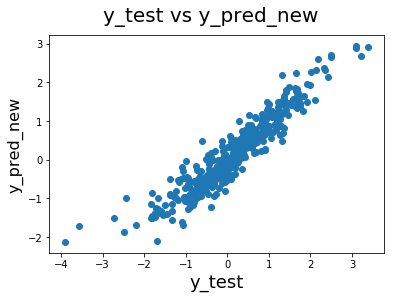

In [101]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred_new)
# Plot heading
fig.suptitle('y_test vs y_pred_new', fontsize=20)
# X-label
plt.xlabel('y_test', fontsize=18)  
 # Y-label
plt.ylabel('y_pred_new', fontsize=16)    

In [102]:
# r2_score check
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_new)

0.8839892992135994

In [103]:
X_train_new.drop('const', axis=1, inplace=True)

In [104]:
X_train_new.head()

OverallQual  TotalBsmtSF  GrLivArea  GarageCars  MSSubClass_160  \
161      2.137999     1.279372   2.409174    1.692924               0   
460      1.415808    -0.476795   0.916102    0.345250               0   
554      0.693617    -0.082844   1.142202    1.692924               0   
107     -0.750764    -0.578842  -1.418223   -1.002424               0   
1307    -0.750764    -0.101829  -1.008800    0.345250               0   

      MSSubClass_40  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  \
161               0            0            0            1            0   
460               0            1            0            0            0   
554               0            0            0            1            0   
107               0            0            0            0            1   
1307              0            0            0            1            0   

              ...           GarageType_Detchd  MiscFeature_NoneType  \
161           ...                           0                     1   
460           ...                           0                     1   
554           ...                           0                     1   
107           ...                           1                     1   
1307          ...                           1                     1   

      MiscFeature_Othr  MiscFeature_Shed  SaleType_Con  SaleType_ConLD  \
161                  0                 0             0               0   
460                  0                 0             0               0   
554                  0                 0             0               0   
107                  0                 0             0               0   
1307                 0                 0             0               0   

      SaleType_New  SaleType_Oth  SaleCondition_AdjLand  SaleCondition_Normal  
161              0             0                      0                     1  
460              1             0                      0                     0  
554              0             0                      0                     1  
107              0             0                      0                     0  
1307             0             0                      0                     1  

[5 rows x 48 columns]

In [105]:
X_train_new.shape

(1011, 48)

In [106]:
X_train_new.columns

Index(['OverallQual', 'TotalBsmtSF', 'GrLivArea', 'GarageCars',
       'MSSubClass_160', 'MSSubClass_40', 'MSZoning_FV', 'MSZoning_RH',
       'MSZoning_RL', 'MSZoning_RM', 'LotConfig_FR3', 'Neighborhood_Blueste',
       'Neighborhood_BrDale', 'Neighborhood_CollgCr', 'Neighborhood_NridgHt',
       'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Neighborhood_Veenker',
       'Condition2_Feedr', 'Condition2_PosN', 'Condition2_RRAn',
       'Condition2_RRNn', 'BldgType_Duplex', 'HouseStyle_1.5Unf',
       'HouseStyle_2.5Fin', 'OverallCond_2', 'OverallCond_3', 'OverallCond_4',
       'OverallCond_7', 'OverallCond_8', 'OverallCond_9',
       'Exterior1st_AsphShn', 'Exterior1st_BrkComm', 'Exterior1st_CBlock',
       'MasVnrType_NoneType', 'KitchenQual_Fa', 'KitchenQual_Gd',
       'KitchenQual_TA', 'GarageType_Detchd', 'MiscFeature_NoneType',
       'MiscFeature_Othr', 'MiscFeature_Shed', 'SaleType_Con',
       'SaleType_ConLD', 'SaleType_New', 'SaleType_Oth',
       'SaleCondition_AdjLand',

In [107]:
X1 = X.loc[:,['OverallQual',
 'TotalBsmtSF',
 'GrLivArea',
 'GarageCars',
 'MSSubClass_160',
 'MSSubClass_40',
 'MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RL',
 'MSZoning_RM',
 'LotConfig_FR3',
 'Neighborhood_Blueste',
 'Neighborhood_BrDale',
 'Neighborhood_CollgCr',
 'Neighborhood_NridgHt',
 'Neighborhood_StoneBr',
 'Neighborhood_Timber',
 'Neighborhood_Veenker',
 'Condition2_Feedr',
 'Condition2_PosN',
 'Condition2_RRAn',
 'Condition2_RRNn',
 'BldgType_Duplex',
 'HouseStyle_1.5Unf',
 'HouseStyle_2.5Fin',
 'OverallCond_2',
 'OverallCond_3',
 'OverallCond_4',
 'OverallCond_7',
 'OverallCond_8',
 'OverallCond_9',
 'Exterior1st_AsphShn',
 'Exterior1st_BrkComm',
 'Exterior1st_CBlock',
 'MasVnrType_NoneType',
 'KitchenQual_Fa',
 'KitchenQual_Gd',
 'KitchenQual_TA',
 'GarageType_Detchd',
 'MiscFeature_NoneType',
 'MiscFeature_Othr',
 'MiscFeature_Shed',
 'SaleType_Con',
 'SaleType_ConLD',
 'SaleType_New',
 'SaleType_Oth',
 'SaleCondition_AdjLand',
 'SaleCondition_Normal']]

y1=  X['SalePrice']

In [108]:
print(X1.shape)
print(y1.shape)

(1445, 48)
(1445,)


In [109]:
# scaling the features


from sklearn.preprocessing import scale

# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)
cols = X1.columns
X1= pd.DataFrame(scale(X1))
X1.columns = cols
X1.columns





Index(['OverallQual', 'TotalBsmtSF', 'GrLivArea', 'GarageCars',
       'MSSubClass_160', 'MSSubClass_40', 'MSZoning_FV', 'MSZoning_RH',
       'MSZoning_RL', 'MSZoning_RM', 'LotConfig_FR3', 'Neighborhood_Blueste',
       'Neighborhood_BrDale', 'Neighborhood_CollgCr', 'Neighborhood_NridgHt',
       'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Neighborhood_Veenker',
       'Condition2_Feedr', 'Condition2_PosN', 'Condition2_RRAn',
       'Condition2_RRNn', 'BldgType_Duplex', 'HouseStyle_1.5Unf',
       'HouseStyle_2.5Fin', 'OverallCond_2', 'OverallCond_3', 'OverallCond_4',
       'OverallCond_7', 'OverallCond_8', 'OverallCond_9',
       'Exterior1st_AsphShn', 'Exterior1st_BrkComm', 'Exterior1st_CBlock',
       'MasVnrType_NoneType', 'KitchenQual_Fa', 'KitchenQual_Gd',
       'KitchenQual_TA', 'GarageType_Detchd', 'MiscFeature_NoneType',
       'MiscFeature_Othr', 'MiscFeature_Shed', 'SaleType_Con',
       'SaleType_ConLD', 'SaleType_New', 'SaleType_Oth',
       'SaleCondition_AdjLand',

In [110]:


# split into train and test
from sklearn.cross_validation import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)


In [111]:
X1_train.head()



OverallQual  TotalBsmtSF  GrLivArea  GarageCars  MSSubClass_160  \
160      2.115479     1.266271   2.296638    1.655549       -0.213509   
452      1.388519    -0.524055   0.847749    0.318339       -0.213509   
545      0.661559    -0.122441   1.067158    1.655549       -0.213509   
106     -0.792361    -0.628087  -1.417499   -1.018871       -0.213509   
1293    -0.792361    -0.141796  -1.020191    0.318339       -0.213509   

      MSSubClass_40  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  \
160       -0.052686    -0.217029    -0.105814     0.521543    -0.421508   
452       -0.052686     4.607686    -0.105814    -1.917388    -0.421508   
545       -0.052686    -0.217029    -0.105814     0.521543    -0.421508   
106       -0.052686    -0.217029    -0.105814    -1.917388     2.372433   
1293      -0.052686    -0.217029    -0.105814     0.521543    -0.421508   

              ...           GarageType_Detchd  MiscFeature_NoneType  \
160           ...                   -0.602667              0.193208   
452           ...                   -0.602667              0.193208   
545           ...                   -0.602667              0.193208   
106           ...                    1.659291              0.193208   
1293          ...                    1.659291              0.193208   

      MiscFeature_Othr  MiscFeature_Shed  SaleType_Con  SaleType_ConLD  \
160          -0.037229         -0.183356     -0.037229       -0.079167   
452          -0.037229         -0.183356     -0.037229       -0.079167   
545          -0.037229         -0.183356     -0.037229       -0.079167   
106          -0.037229         -0.183356     -0.037229       -0.079167   
1293         -0.037229         -0.183356     -0.037229       -0.079167   

      SaleType_New  SaleType_Oth  SaleCondition_AdjLand  SaleCondition_Normal  
160      -0.300942     -0.045612              -0.052686              0.468411  
452       3.322900     -0.045612              -0.052686             -2.134875  
545      -0.300942     -0.045612              -0.052686              0.468411  
106      -0.300942     -0.045612              -0.052686             -2.134875  
1293     -0.300942     -0.045612              -0.052686              0.468411  

[5 rows x 48 columns]

In [112]:
X1_test.head()

OverallQual  TotalBsmtSF  GrLivArea  GarageCars  MSSubClass_160  \
1164    -0.065401    -0.557926  -0.557654   -1.018871       -0.213509   
30      -1.519321    -0.966798  -0.373825   -1.018871       -0.213509   
886     -0.792361    -0.330506  -0.533934   -1.018871       -0.213509   
1191    -0.792361     0.017881  -0.854152    0.318339       -0.213509   
275      2.115479     2.594499   1.215407    1.655549       -0.213509   

      MSSubClass_40  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  \
1164      -0.052686    -0.217029    -0.105814    -1.917388     2.372433   
30        -0.052686    -0.217029    -0.105814    -1.917388    -0.421508   
886       -0.052686    -0.217029    -0.105814     0.521543    -0.421508   
1191      -0.052686    -0.217029    -0.105814     0.521543    -0.421508   
275       -0.052686    -0.217029    -0.105814     0.521543    -0.421508   

              ...           GarageType_Detchd  MiscFeature_NoneType  \
1164          ...                    1.659291              0.193208   
30            ...                    1.659291              0.193208   
886           ...                   -0.602667              0.193208   
1191          ...                   -0.602667              0.193208   
275           ...                   -0.602667              0.193208   

      MiscFeature_Othr  MiscFeature_Shed  SaleType_Con  SaleType_ConLD  \
1164         -0.037229         -0.183356     -0.037229       -0.079167   
30           -0.037229         -0.183356     -0.037229       -0.079167   
886          -0.037229         -0.183356     -0.037229       -0.079167   
1191         -0.037229         -0.183356     -0.037229       -0.079167   
275          -0.037229         -0.183356     -0.037229       -0.079167   

      SaleType_New  SaleType_Oth  SaleCondition_AdjLand  SaleCondition_Normal  
1164     -0.300942     -0.045612              -0.052686              0.468411  
30       -0.300942     -0.045612              -0.052686              0.468411  
886      -0.300942     -0.045612              -0.052686              0.468411  
1191     -0.300942     -0.045612              -0.052686              0.468411  
275       3.322900     -0.045612              -0.052686             -2.134875  

[5 rows x 48 columns]

In [113]:
y1_train.shape

(1011,)

## Ridge and Lasso Regression

Let's now try predicting house prices, a dataset used in simple linear regression, to perform ridge and lasso regression.

## Ridge Regression

In [114]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

X_train_ridge = X1_train.copy()
Y_train_ridge = y1_train.copy()
X_test_ridge = X1_test.copy()
Y_test_ridge = y1_test.copy()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X1_train, y1_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.4s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [115]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.001994  6.306758e-04         0.000599        0.000489      0.0001   
1       0.002994  8.939403e-04         0.000599        0.000489       0.001   
2       0.001995  7.747687e-07         0.000199        0.000399        0.01   
3       0.001991  9.565786e-06         0.000601        0.000491        0.05   
4       0.001994  6.304495e-04         0.000199        0.000399         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}          -0.097399          -0.115517          -0.108661   
1   {'alpha': 0.001}          -0.097399          -0.115517          -0.108661   
2    {'alpha': 0.01}          -0.097399          -0.115517          -0.108661   
3    {'alpha': 0.05}          -0.097401          -0.115519          -0.108660   
4     {'alpha': 0.1}          -0.097404          -0.115522          -0.108660   

   split3_test_score       ...         mean_test_score  std_test_score  \
0          -0.094726       ...               -0.100937        0.009799   
1          -0.094726       ...               -0.100937        0.009799   
2          -0.094726       ...               -0.100937        0.009799   
3          -0.094724       ...               -0.100937        0.009801   
4          -0.094723       ...               -0.100936        0.009803   

   rank_test_score  split0_train_score  split1_train_score  \
0               24           -0.093114           -0.087335   
1               23           -0.093114           -0.087335   
2               22           -0.093114           -0.087335   
3               21           -0.093114           -0.087336   
4               20           -0.093114           -0.087337   

   split2_train_score  split3_train_score  split4_train_score  \
0           -0.089597           -0.092928           -0.094625   
1           -0.089597           -0.092928           -0.094625   
2           -0.089598           -0.092928           -0.094626   
3           -0.089599           -0.092929           -0.094628   
4           -0.089602           -0.092931           -0.094630   

   mean_train_score  std_train_score  
0         -0.091520          0.00266  
1         -0.091520          0.00266  
2         -0.091520          0.00266  
3         -0.091521          0.00266  
4         -0.091523          0.00266  

[5 rows x 21 columns]

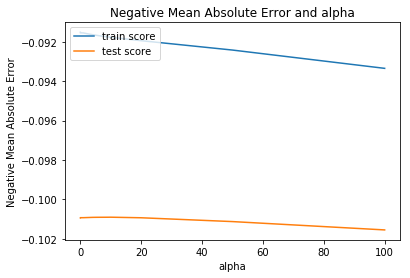

In [116]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [117]:
alpha = 15
ridge = Ridge(alpha=alpha)

ridge.fit(X1_train, y1_train)
ridge.coef_

array([ 0.08950157,  0.06336668,  0.14152631,  0.06587698, -0.01768068,
        0.00570316,  0.04461241,  0.01098084,  0.05106913, -0.0026969 ,
        0.00558675,  0.00374167,  0.00689715,  0.01274964,  0.01569024,
        0.01496373,  0.00719134,  0.00784343, -0.00794064, -0.00272567,
       -0.00393176,  0.00433332, -0.01527748, -0.0053191 , -0.0074977 ,
       -0.01331171, -0.03187784, -0.02068691,  0.02056995,  0.01535681,
        0.01518059, -0.00222255, -0.00713192, -0.00340639,  0.00378393,
       -0.02597317, -0.03522058, -0.05723938, -0.02583068,  0.01270284,
       -0.00700702,  0.01014212,  0.00803613,  0.00338232,  0.04372884,
        0.00886962,  0.00522009,  0.03191722])

In [118]:
ridge_train_score = ridge.score(X1_train, y1_train)
ridge_train_score

0.8947388295486473

In [119]:
ridge.fit(X1_test, y1_test)
ridge_test_score = ridge.score(X1_test, y1_test)
ridge_test_score

0.9040154571447749

## Lasso

In [120]:
params = {'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.001]}

lasso = Lasso()


X_train_lasso = X1_train.copy()
Y_train_lasso = y1_train.copy()
X_test_lasso = X1_test.copy()
Y_test_lasso = y1_test.copy()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X1_train, y1_train) 

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.1s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [121]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.007784      0.001324         0.000598        0.000489      0.0001   
1       0.005186      0.000978         0.000599        0.000489      0.0002   
2       0.004586      0.001019         0.000599        0.000489      0.0003   
3       0.004387      0.001197         0.000000        0.000000      0.0004   
4       0.003390      0.001017         0.000000        0.000000      0.0005   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}          -0.097502          -0.115565          -0.108786   
1  {'alpha': 0.0002}          -0.097643          -0.115607          -0.108921   
2  {'alpha': 0.0003}          -0.097733          -0.115642          -0.109056   
3  {'alpha': 0.0004}          -0.097779          -0.115676          -0.109144   
4  {'alpha': 0.0005}          -0.097829          -0.115720          -0.108991   

   split3_test_score       ...         mean_test_score  std_test_score  \
0          -0.094714       ...               -0.100970        0.009852   
1          -0.094707       ...               -0.101014        0.009902   
2          -0.094701       ...               -0.101046        0.009953   
3          -0.094694       ...               -0.101061        0.009997   
4          -0.094697       ...               -0.101030        0.010007   

   rank_test_score  split0_train_score  split1_train_score  \
0                1           -0.093181           -0.087444   
1                3           -0.093256           -0.087561   
2                6           -0.093335           -0.087675   
3                7           -0.093411           -0.087792   
4                5           -0.093489           -0.087917   

   split2_train_score  split3_train_score  split4_train_score  \
0           -0.089699           -0.093034           -0.094733   
1           -0.089804           -0.093152           -0.094853   
2           -0.089915           -0.093273           -0.094982   
3           -0.090025           -0.093399           -0.095116   
4           -0.090118           -0.093496           -0.095220   

   mean_train_score  std_train_score  
0         -0.091618         0.002655  
1         -0.091725         0.002653  
2         -0.091836         0.002654  
3         -0.091949         0.002655  
4         -0.092048         0.002647  

[5 rows x 21 columns]

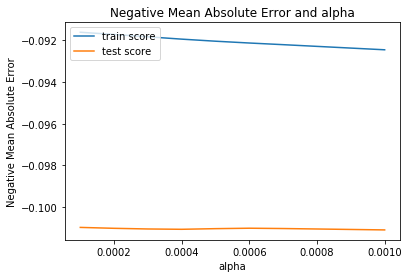

In [122]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [123]:
alpha =0.0002

lasso = Lasso(alpha=alpha)
        
lasso.fit(X1_train, y1_train) 

Lasso(alpha=0.0002, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [124]:
lasso.coef_

array([ 0.08845745,  0.06344555,  0.14364365,  0.06588631, -0.01768151,
        0.00548046,  0.05427723,  0.01547603,  0.06915277,  0.01284388,
        0.0054422 ,  0.00369041,  0.00702787,  0.01287652,  0.01484892,
        0.01471957,  0.00698844,  0.00765131, -0.00747825, -0.00274712,
       -0.00385834,  0.00420409, -0.01551297, -0.00497511, -0.00785285,
       -0.01307664, -0.03181868, -0.02053187,  0.02076528,  0.01533961,
        0.01512894, -0.00210147, -0.00703727, -0.00334249,  0.00333844,
       -0.02757297, -0.03982131, -0.06178617, -0.02551003,  0.01204593,
       -0.00695844,  0.00964414,  0.00804244,  0.00420971,  0.04427552,
        0.00892981,  0.00520932,  0.03259658])

In [125]:
lasso_train_score = lasso.score(X1_train, y1_train)
lasso_train_score

0.8950070777475283

In [126]:
lasso.fit(X1_test, y1_test)
lasso_test_score = lasso.score(X1_test, y1_test)
lasso_test_score

0.9125120870990256

### RIDGE  Prediction

In [127]:
#  Let's make prediction using final model

y_test_predict_ridge  = ridge.predict(X_test_ridge)
from sklearn.metrics import r2_score
r2_score(Y_test_ridge, y_test_predict_ridge)

0.9040154571447749

### LASSO  Prediction

In [128]:
#  Let's make prediction using final model

y_test_predict_lasso  = lasso.predict(X_test_lasso)
from sklearn.metrics import r2_score
r2_score(Y_test_lasso, y_test_predict_lasso)

0.9125120870990256

## FINAL MODEL 

In [129]:
# Since the test accuracy for lasso is almost similar to that of RIDGE
# let's choose Lasso as final model.  


# Let's create a new data frame with lasso coeff values, corresponding column names and absolute coefficient values
lasso_df = pd.DataFrame() 
lasso_df['Coeff'] = pd.Series(lasso.coef_) 
lasso_df['Vars'] = X_train_lasso.columns

# Removing rows that have coeff = 0
lasso_df = lasso_df.loc[lasso_df['Coeff']!=0]

lasso_df['Absolute Coeff Value'] =lasso_df['Coeff'].apply(lambda x:abs(x))
lasso_df.sort_values(by=['Absolute Coeff Value'],inplace=True,ascending=False)

print(lasso_df.head(20))

       Coeff                  Vars  Absolute Coeff Value
8   0.284677           MSZoning_RL              0.284677
9   0.202695           MSZoning_RM              0.202695
6   0.156241           MSZoning_FV              0.156241
2   0.121533             GrLivArea              0.121533
0   0.117809           OverallQual              0.117809
1   0.077608           TotalBsmtSF              0.077608
7   0.068358           MSZoning_RH              0.068358
3   0.067515            GarageCars              0.067515
37 -0.040483        KitchenQual_TA              0.040483
26 -0.033609         OverallCond_3              0.033609
47  0.027242  SaleCondition_Normal              0.027242
35 -0.025200        KitchenQual_Fa              0.025200
27 -0.025101         OverallCond_4              0.025101
28  0.024016         OverallCond_7              0.024016
44  0.019453          SaleType_New              0.019453
38 -0.015148     GarageType_Detchd              0.015148
14  0.015116  Neighborhood_Nrid

--are the  variables which are significant in predicting the price of a house

---and the Absolute Coeff Value of above variables shows how much they affect the price of the house


### Inferences & Conclusions

## Final Outcome

##variables which are significant in predicting the price of a house  

### Top 10 vriables



#### MSZoning_RL-       0.284677
#### MSZoning_RM-      0.202695
#### MSZoning_FV        0.156241
#### GrLivArea -             0.121533
#### OverallQual-           0.117809
#### TotalBsmtSF-          0.077608
#### MSZoning_RH-       0.068358
#### GarageCars-            0.067515
#### KitchenQual_TA       0.040483
#### OverallCond_3         0.033609
#### SaleCondition_Normal          0.027242             

            
#### the Absolute Coeff Value of above variables shows how much they affect the price of the house**




### The optimal value of lambda for ridge and lasso regression.

##### The optimal value of lambda for ridge regression  is   alpha = 15**

##### The optimal value of lambda for lasso regression  is   alpha = 0.002**


### Model Equation is:
    
##### y  =   0.284677* MSZoning_RL  + 0.202695*  MSZoning_RM+    0.156241*  MSZoning_FV  +   0.121533 * 'GrLivArea' +    0.117809 *'OverallQual' +  0.077608* 'TotalBsmtSF' +    0.068358* MSZoning_RH  +   0.067515*'GarageCars' +    0.040483* KitchenQual_TA  + 0.033609*OverallCond_3
